In [32]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

In [94]:
def plot_examples_of_cluster_coefficients(G, nodes, coefficients):
    fig, axis = plt.subplots(nrows=1, ncols=len(nodes), figsize=(4 * len(nodes), 4))
    for i, node in enumerate(nodes):
        S = nx.ego_graph(G, node)

        pos = nx.kamada_kawai_layout(S)
        nx.draw_networkx_labels(S, pos=pos, ax=axis[i])
        nx.draw_networkx_nodes(S, pos=pos, ax=axis[i])
        nx.draw_networkx_nodes(S, pos=pos, nodelist=[node], node_color='red', ax=axis[i])
        nx.draw_networkx_edges(S, pos=pos, ax=axis[i])
        
        axis[i].set_title(f"Clustering coefficient: {round(coefficients[node], 2)}")

# Loading graph

In [8]:
fig_size = (4, 4)

In [9]:
G = nx.karate_club_graph()

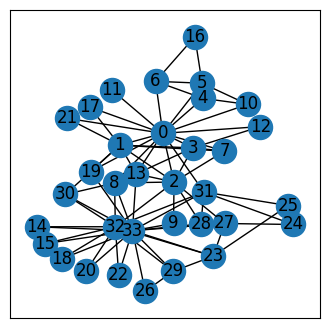

In [10]:
fig = plt.figure(figsize=fig_size)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos);

# Degree distribution

In graph theory, the degree of a node is how many edges connect to it, and the degree distribution is how these degrees are distributed throughout the entire network.

In [20]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print(degree_sequence)

[17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]


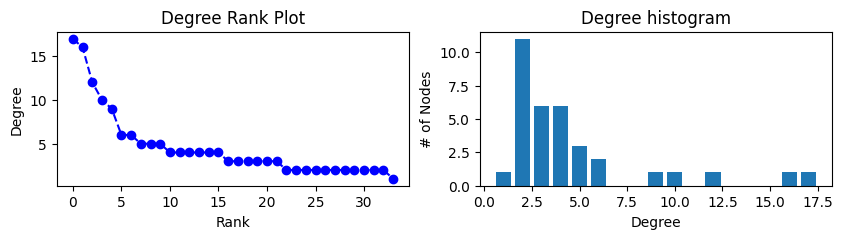

In [45]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
axis[0].plot(degree_sequence, 'b--', marker="o")
axis[0].set_title("Degree Rank Plot")
axis[0].set_ylabel("Degree")
axis[0].set_xlabel("Rank")

axis[1].bar(*np.unique(degree_sequence, return_counts=True))
axis[1].set_title("Degree histogram")
axis[1].set_xlabel("Degree")
axis[1].set_ylabel("# of Nodes");

# Clustering coefficient

A clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. 

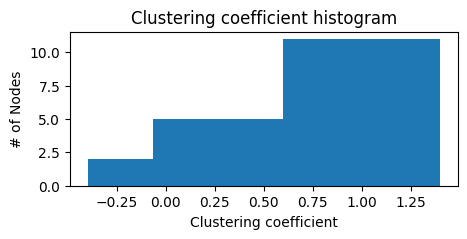

In [66]:
coefficients = nx.clustering(G)

ax = plt.figure(figsize=(5, 2))
plt.bar(*np.unique(list(coefficients.values()), return_counts=True))
plt.title("Clustering coefficient histogram")
plt.xlabel("Clustering coefficient")
plt.ylabel("# of Nodes");

## Examples

Different coefficient values show the differentiation of connections between neighboring nodes.

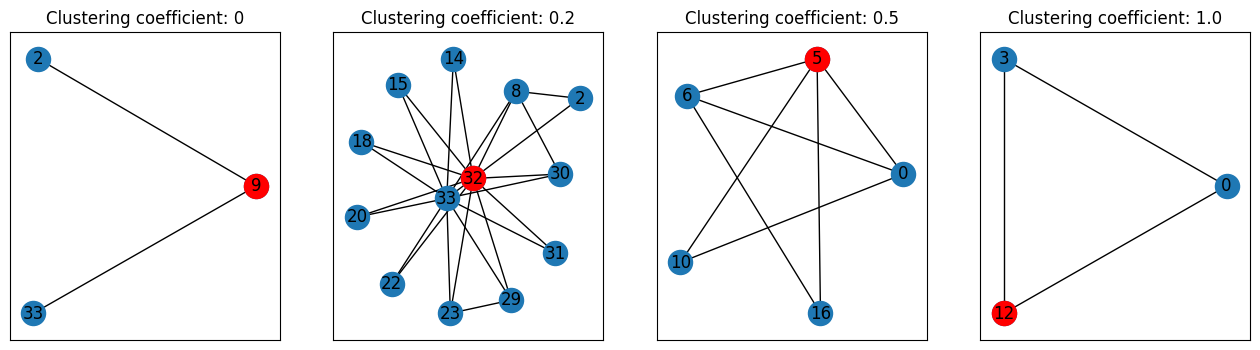

In [95]:
plot_examples_of_cluster_coefficients(G, nodes=[9, 32, 5, 12], coefficients=coefficients);

## Average clustering coefficient

In [65]:
nx.average_clustering(G)

0.5706384782076823

# Connectivity

A connectivity is size of the largest connected component.

In [100]:
max(map(len, list(nx.connected_components(G))))

34

In the Karate club graph all nodes are connected. Connectivity is equal to order of the graph.

In [101]:
nx.is_connected(G)

True

In [105]:
G.order()

34

# Path length

The average shortest path length is the sum of path lengths d(u,v) between all pairs of nodes (assuming the length is zero if v is not reachable from v) normalized by n*(n-1) where n is the number of nodes in G.

In [107]:
nx.average_shortest_path_length(G)

2.408199643493761